### AAI-530 Final Project: Delivery Drone Flight Predictions
<br>Group 6: Ahmed Salem, Matt Thompson, Darin Verduzco
<br>GitHub: https://github.com/caliskate/delivery-drone-flight-predictions
<br>Dataset source: https://doi.org/10.1184/R1/12683453.v1

### Dataset descriptions:
Dron Model: DJI Matrice 100
<br>Its standard battery has a capacity of 4500 mAh which gives it a flight time of 22 minutes

257,896 original values
(196 flights total, 18 unique flight dates, 11.5 average number of flights per day)

| **Variable**            | **Description**                                                                                                                                 |
|-------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------|
| **flight**              | An integer that represents the code of the flight performed. A flight is defined as the dataset recorded from take-off to landing on a predefined route. |
| **time**                | Seconds elapsed after flight start time.                                                                                                        |
| **wind_speed**          | Airspeed provided by the anemometer in meters per second (m/s).                                                                                |
| **wind_angle**          | Angle in degrees (deg) of the air flowing through the anemometer with respect to the north.                                                     |
| **battery_voltage**     | System voltage in Volts (V) measured immediately after the battery.                                                                             |
| **battery_current**     | System current in Ampere (A) measured immediately after the battery.                                                                           |
| **position_x**          | Longitude of the aircraft in degrees (deg).                                                                                                    |
| **position_y**          | Latitude of the aircraft in degrees (deg).                                                                                                     |
| **position_z**          | Altitude of the aircraft in meters (m) with respect to sea level.                                                                              |
| **orientation_x**       | Aircraft orientation in quaternions.                                                                                                           |
| **linear_acceleration_x**| Ground acceleration in meters per squared second (m/s²).                                                                                      |
| **linear_acceleration_y**| Ground acceleration in meters per squared second (m/s²).                                                                                      |
| **linear_acceleration_z**| Ground acceleration in meters per squared second (m/s²).                                                                                      |
| **speed**               | Programmed horizontal ground speed during cruise in meters per second (m/s).                                                                  |
| **altitude**            | Predefined altitude in meters (m). The aircraft takes off vertically until it reaches the preset altitude.                                      |
| **payload**             | Mass of the payload attached to the aircraft in grams (g). The payload used was confined in a standard USPS Small Flat Rate Box.                  |
| **date**                | Date of the flight.                                                                                                                            |
| **time_day**            | Local time when the flight started in the 24-hour format.                                                                                       |
| **route**               | Route type (see directly below):                                                                                                                |
|                         | - R1 to R7: Full flights completing a cruise movement.                                                                                          |
|                         | - A1: Ancillary ground test with no propellers and no motor movement.                                                                          |
|                         | - A2: Ancillary ground test with no propellers and minimum movement.                                                                           |
|                         | - A3: Ancillary ground test with propellers and minimum movement.                                                                              |
|                         | - H: Hover test with no horizontal movement.                                                                                                    |

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

### Import dataset from local dir

In [2]:
drone_raw_df =  pd.read_csv("flights.csv", low_memory = False)
drone_raw_df.head()

,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,orientation_x,...,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,altitude,date,time_day,route
0,1,0.0,0.1,12.0,24.222174,0.087470,-79.782396,40.458047,269.332402,0.001772,...,0.006815,0.004258,-0.120405,-9.811137,4.0,0.0,25,2019-04-07,10:13,R5
1,1,0.2,0.1,3.0,24.227180,0.095421,-79.782396,40.458047,269.332056,0.001768,...,0.002034,0.006175,-0.116397,-9.810392,4.0,0.0,25,2019-04-07,10:13,R5
2,1,0.3,0.1,352.0,24.225929,0.095421,-79.782396,40.458047,269.333081,0.001768,...,-0.000874,0.002696,-0.128592,-9.809440,4.0,0.0,25,2019-04-07,10:13,R5
3,1,0.5,0.1,354.0,24.224678,0.095421,-79.782396,40.458047,269.334648,0.001775,...,0.002443,0.002024,-0.128271,-9.810159,4.0,0.0,25,2019-04-07,10:13,R5
4,1,0.6,0.1,359.0,24.210905,0.079518,-79.782396,40.458047,269.336178,0.001775,...,-0.006425,0.008271,-0.119890,-9.812125,4.0,0.0,25,2019-04-07,10:13,R5


In [3]:
drone_raw_df.describe()

,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,orientation_x,...,velocity_y,velocity_z,angular_x,angular_y,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload
count,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,...,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000
mean,162.445513,97.766940,4.337992,169.470760,22.435459,17.932477,-77.773754,39.438805,295.812932,-0.010096,...,2.273353,0.296500,-0.001222,0.000121,0.028713,-0.317346,0.017140,-9.795682,7.325116,240.937238
std,71.445026,62.667401,3.494649,101.176006,1.200742,10.865654,12.506800,6.342148,58.305928,0.047414,...,3.294641,1.459703,0.116713,0.175669,0.251162,0.772273,0.460883,0.462295,3.209065,211.373066
min,1.000000,0.000000,0.000000,0.000000,18.810810,-0.326023,-79.946543,0.000000,0.000000,-0.546413,...,-4.230620,-4.015751,-2.279608,-3.674915,-1.857536,-5.889537,-9.108024,-22.687924,0.000000,0.000000
25%,112.000000,46.200000,1.500000,80.000000,21.513987,7.140693,-79.782786,40.458878,271.311215,-0.023949,...,0.000000,-0.143707,-0.043230,-0.038335,-0.040691,-0.691028,-0.203128,-9.895812,4.000000,0.000000
50%,166.000000,93.000000,3.300000,177.000000,22.306536,21.923040,-79.782747,40.458994,292.120051,-0.001910,...,0.064984,0.028842,-0.000317,0.000070,0.001101,-0.052744,0.010875,-9.801070,8.000000,250.000000
75%,223.000000,141.400000,6.500000,244.000000,23.162939,25.270737,-79.782259,40.459057,325.245442,0.010370,...,4.010875,0.850420,0.041166,0.040656,0.051446,0.179579,0.227538,-9.661465,10.000000,500.000000
max,279.000000,428.290000,18.100000,359.000000,25.894913,47.193779,0.000000,40.459682,376.188721,0.414962,...,12.703530,5.842570,3.022839,2.833664,2.172410,4.647753,7.139876,-3.830504,12.000000,750.000000


In [4]:
drone_raw_df.dtypes

flight                     int64
time                     float64
wind_speed               float64
wind_angle               float64
battery_voltage          float64
battery_current          float64
position_x               float64
position_y               float64
position_z               float64
orientation_x            float64
orientation_y            float64
orientation_z            float64
orientation_w            float64
velocity_x               float64
velocity_y               float64
velocity_z               float64
angular_x                float64
angular_y                float64
angular_z                float64
linear_acceleration_x    float64
linear_acceleration_y    float64
linear_acceleration_z    float64
speed                    float64
payload                  float64
altitude                  object
date                      object
time_day                  object
route                     object
dtype: object

# Data cleanup

In [5]:
# Make a copy of the dataframe to be edited
drone_df_edited = drone_raw_df.copy()

In [6]:
# Show unique altitude values
unique_altitude = drone_df_edited['altitude'].unique()
print(unique_altitude)

['25' '50' '75' '100' '0' '3' '25-50-100-25']


In [7]:
# Count altitudes with dash
altitude_with_dash_count = drone_df_edited['altitude'].str.contains('-').sum()
print(altitude_with_dash_count)

2185


In [8]:
# Drop (non-numeric) rows with dash in altitude, no documentation on this value explanation
drone_df_edited = drone_df_edited[~drone_df_edited['altitude'].str.contains('-')]
# Convert altitude to numeric
drone_df_edited.loc[:, 'altitude'] = pd.to_numeric(drone_df_edited['altitude'], errors='coerce')

In [9]:
unique_altitude = drone_df_edited['altitude'].unique()
print(unique_altitude)

[25 50 75 100 0 3]


In [10]:
# Convert route to categorical data
label_encoder = LabelEncoder()
drone_df_edited['route_encoded'] = label_encoder.fit_transform(drone_df_edited['route'])

In [11]:
# Combine time, time_day and date columns into a datetime column, 
# Round seconds for standard datetime format
drone_df_edited['datetime'] = (
    pd.to_datetime(drone_df_edited['date'] + ' ' + drone_df_edited['time_day']) +
    pd.to_timedelta(drone_df_edited['time'], unit='s')
).dt.round('s')

In [12]:
# Convert date and time_day to datetime segment datatypes
drone_df_edited['date'] = drone_df_edited['datetime'].dt.date
drone_df_edited['time_day'] = drone_df_edited['datetime'].dt.time

#### Estimate battery percentage (DJI Matrice 100, 4500 mAh TB47D battery)

In [38]:
# Assisted by ChatGPT
# Constants
BATTERY_CAPACITY_WH = 99.9  # TB47D full charge in watt-hours
BATTERY_CAPACITY_J = BATTERY_CAPACITY_WH * 3600  # Convert to joules

# Compute power (W) at each time step
drone_df_edited['power'] = drone_df_edited['battery_voltage'] * drone_df_edited['battery_current']

# Compute elapsed time (seconds) between each row
drone_df_edited['time_diff'] = drone_df_edited['time'].diff().fillna(0)

# Compute cumulative energy consumption (Joules)
drone_df_edited['energy_used'] = np.cumsum(drone_df_edited['power'] * drone_df_edited['time_diff'])

# Compute battery percentage remaining
drone_df_edited['battery_percent'] = 100 * (1 - (drone_df_edited['energy_used'] / BATTERY_CAPACITY_J))

# Ensure percentage is between 0 and 100
drone_df_edited['battery_percent'] = drone_df_edited['battery_percent'].clip(0, 100)

In [43]:
# Add minutes column for flights
drone_df_edited['flight_minutes'] = pd.to_numeric(drone_df_edited['time']/60)

In [40]:
drone_df_edited.to_excel('battery_percent_flights.xlsx', index=False)

# Data evaluation

#### Average flght time for full flights (route = R1-R7)

In [41]:
drone_df_edited['time'].head()

0       0.00
5541    7.70
5540    7.60
5539    7.40
5538    7.31
Name: time, dtype: float64

In [13]:
# Assisted by ChatGPT
# Filter dataset for routes R1 to R7
filtered_df = drone_df_edited[drone_df_edited['route'].str.startswith('R')]

# Calculate flight time as the max - min time for each flight
flight_time_df = filtered_df.groupby('flight')['time'].agg(lambda x: x.max() - x.min()).reset_index()

# Rename column for clarity
flight_time_df.rename(columns={'time': 'flight_time_seconds'}, inplace=True)

# Compute average flight time across all selected flights
average_flight_time = flight_time_df['flight_time_seconds'].mean()

print(f'Average flight time for full flights (minutes) {average_flight_time/60:0.2f}')

Average flight time for full flights (minutes) 3.16


In [14]:
drone_df_edited.head()

,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,orientation_x,...,linear_acceleration_y,linear_acceleration_z,speed,payload,altitude,date,time_day,route,route_encoded,datetime
0,1,0.0,0.1,12.0,24.222174,0.087470,-79.782396,40.458047,269.332402,0.001772,...,-0.120405,-9.811137,4.0,0.0,25,2019-04-07,10:13:00,R5,8,2019-04-07 10:13:00
1,1,0.2,0.1,3.0,24.227180,0.095421,-79.782396,40.458047,269.332056,0.001768,...,-0.116397,-9.810392,4.0,0.0,25,2019-04-07,10:13:00,R5,8,2019-04-07 10:13:00
2,1,0.3,0.1,352.0,24.225929,0.095421,-79.782396,40.458047,269.333081,0.001768,...,-0.128592,-9.809440,4.0,0.0,25,2019-04-07,10:13:00,R5,8,2019-04-07 10:13:00
3,1,0.5,0.1,354.0,24.224678,0.095421,-79.782396,40.458047,269.334648,0.001775,...,-0.128271,-9.810159,4.0,0.0,25,2019-04-07,10:13:00,R5,8,2019-04-07 10:13:00
4,1,0.6,0.1,359.0,24.210905,0.079518,-79.782396,40.458047,269.336178,0.001775,...,-0.119890,-9.812125,4.0,0.0,25,2019-04-07,10:13:01,R5,8,2019-04-07 10:13:01


In [15]:
# Edited dataset summary
desc = drone_df_edited.describe()

# Force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,orientation_x,...,angular_x,angular_y,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,route_encoded,datetime
count,255711.0000,255711.0000,255711.0000,255711.0000,255711.0000,255711.0000,255711.0000,255711.0000,255711.0000,255711.0000,...,255711.0000,255711.0000,255711.0000,255711.0000,255711.0000,255711.0000,255711.0000,255711.0000,255711.0000,255711
mean,161.4543,97.8696,4.3336,169.2189,22.4382,17.9392,-77.7566,39.4301,295.7696,-0.0102,...,-0.0012,0.0001,0.0287,-0.3170,0.0165,-9.7958,7.3023,240.6555,4.1913,2019-07-06 06:10:41.085811456
min,1.0000,0.0000,0.0000,0.0000,18.8108,-0.3260,-79.9465,0.0000,0.0000,-0.5464,...,-2.2796,-3.6749,-1.8575,-5.8895,-9.1080,-22.6879,0.0000,0.0000,0.0000,2019-04-07 10:13:00
25%,112.0000,46.2100,1.5000,79.0000,21.5177,7.6417,-79.7828,40.4589,271.2835,-0.0241,...,-0.0433,-0.0384,-0.0407,-0.6916,-0.2032,-9.8959,4.0000,0.0000,4.0000,2019-06-24 11:16:00
50%,165.0000,93.1000,3.3000,177.0000,22.3115,21.9310,-79.7827,40.4590,292.1257,-0.0019,...,-0.0003,0.0001,0.0011,-0.0524,0.0100,-9.8011,8.0000,250.0000,4.0000,2019-07-03 16:58:48
75%,222.0000,141.5000,6.5000,244.0000,23.1642,25.2628,-79.7823,40.4591,325.2835,0.0103,...,0.0412,0.0407,0.0514,0.1796,0.2267,-9.6618,10.0000,500.0000,4.0000,2019-07-18 14:27:09
max,277.0000,428.2900,18.1000,359.0000,25.8949,47.1938,0.0000,40.4597,376.1887,0.4150,...,3.0228,2.8337,2.1724,4.6478,7.1399,-3.8305,12.0000,750.0000,9.0000,2019-10-24 09:47:15
std,70.9368,62.7548,3.4912,101.3437,1.2003,10.8540,12.5587,6.3685,58.4780,0.0475,...,0.1165,0.1753,0.2510,0.7706,0.4617,0.4617,3.2132,211.0019,1.2006,NaN


In [16]:
# Verify edited datatypes
drone_df_edited.dtypes

flight                            int64
time                            float64
wind_speed                      float64
wind_angle                      float64
battery_voltage                 float64
battery_current                 float64
position_x                      float64
position_y                      float64
position_z                      float64
orientation_x                   float64
orientation_y                   float64
orientation_z                   float64
orientation_w                   float64
velocity_x                      float64
velocity_y                      float64
velocity_z                      float64
angular_x                       float64
angular_y                       float64
angular_z                       float64
linear_acceleration_x           float64
linear_acceleration_y           float64
linear_acceleration_z           float64
speed                           float64
payload                         float64
altitude                         object


In [17]:
# Count missing values
na_values = drone_df_edited.isna().sum()
print(na_values)

flight                   0
time                     0
wind_speed               0
wind_angle               0
battery_voltage          0
battery_current          0
position_x               0
position_y               0
position_z               0
orientation_x            0
orientation_y            0
orientation_z            0
orientation_w            0
velocity_x               0
velocity_y               0
velocity_z               0
angular_x                0
angular_y                0
angular_z                0
linear_acceleration_x    0
linear_acceleration_y    0
linear_acceleration_z    0
speed                    0
payload                  0
altitude                 0
date                     0
time_day                 0
route                    0
route_encoded            0
datetime                 0
dtype: int64


In [18]:
# Count number of flight times per day
drone_df_edited.groupby('date')['time_day'].nunique()

date
2019-04-07    1250
2019-05-06    1600
2019-06-05     465
2019-06-11    2543
2019-06-19    2870
2019-06-24    2289
2019-06-25    2330
2019-06-29    1534
2019-07-01    1477
2019-07-03    2967
2019-07-09    2174
2019-07-10    2426
2019-07-15    3883
2019-07-18    1555
2019-07-24    3160
2019-08-05    4192
2019-09-19    1426
2019-10-24     435
Name: time_day, dtype: int64

In [19]:
average_flights_per_day = drone_df_edited.groupby('date')['time_day'].nunique().mean()
print(f'Average flights per day:{average_flights_per_day: 0.2f}')

Average flights per day: 2143.11


In [20]:
number_of_flight_dates = drone_df_edited['date'].nunique()
print(f'Number of unique flight dates: {number_of_flight_dates}')

Number of unique flight dates: 18


In [21]:
# Check for duplicates across all rows in the dataset
duplicates = drone_df_edited.duplicated().sum()
print(f"duplicate dataset rows: {duplicates}")

duplicate dataset rows: 0


### <b><u>Prediction 1 (time series): 
<b><u>Predict drone flight energy consumption for future time intervals based on payload, altitude, speed, wind.</b></u>
<br><br><b>predicted/dependent variables:</b> battery_current, battery_voltage
<br><b>feature/independent variables:</b> payload, altitude, speed, wind_speed, wind_angle

### <b><u> Prediction 2 (Deep Neural Network Classification):</b></u>
<b><u>Classify optimal flight parameters (altitude, speed, payload) that minimize energy consumption
<br>based upon flight conditions (e.g., wind speed and battery level).</b></u>
<br><br><b>predicted/dependent variables:</b> altitude, speed, payload
<br><b>feature/independent variables:</b> wind_speed, wind_angle, battery_voltage, battery_current 
<br><br><b>other possible independent variables:</b> position (x,y,z), orientation(x,y,z), velocity (x,y,z), angular (x,y,z), linear acceleration (x,y,z))

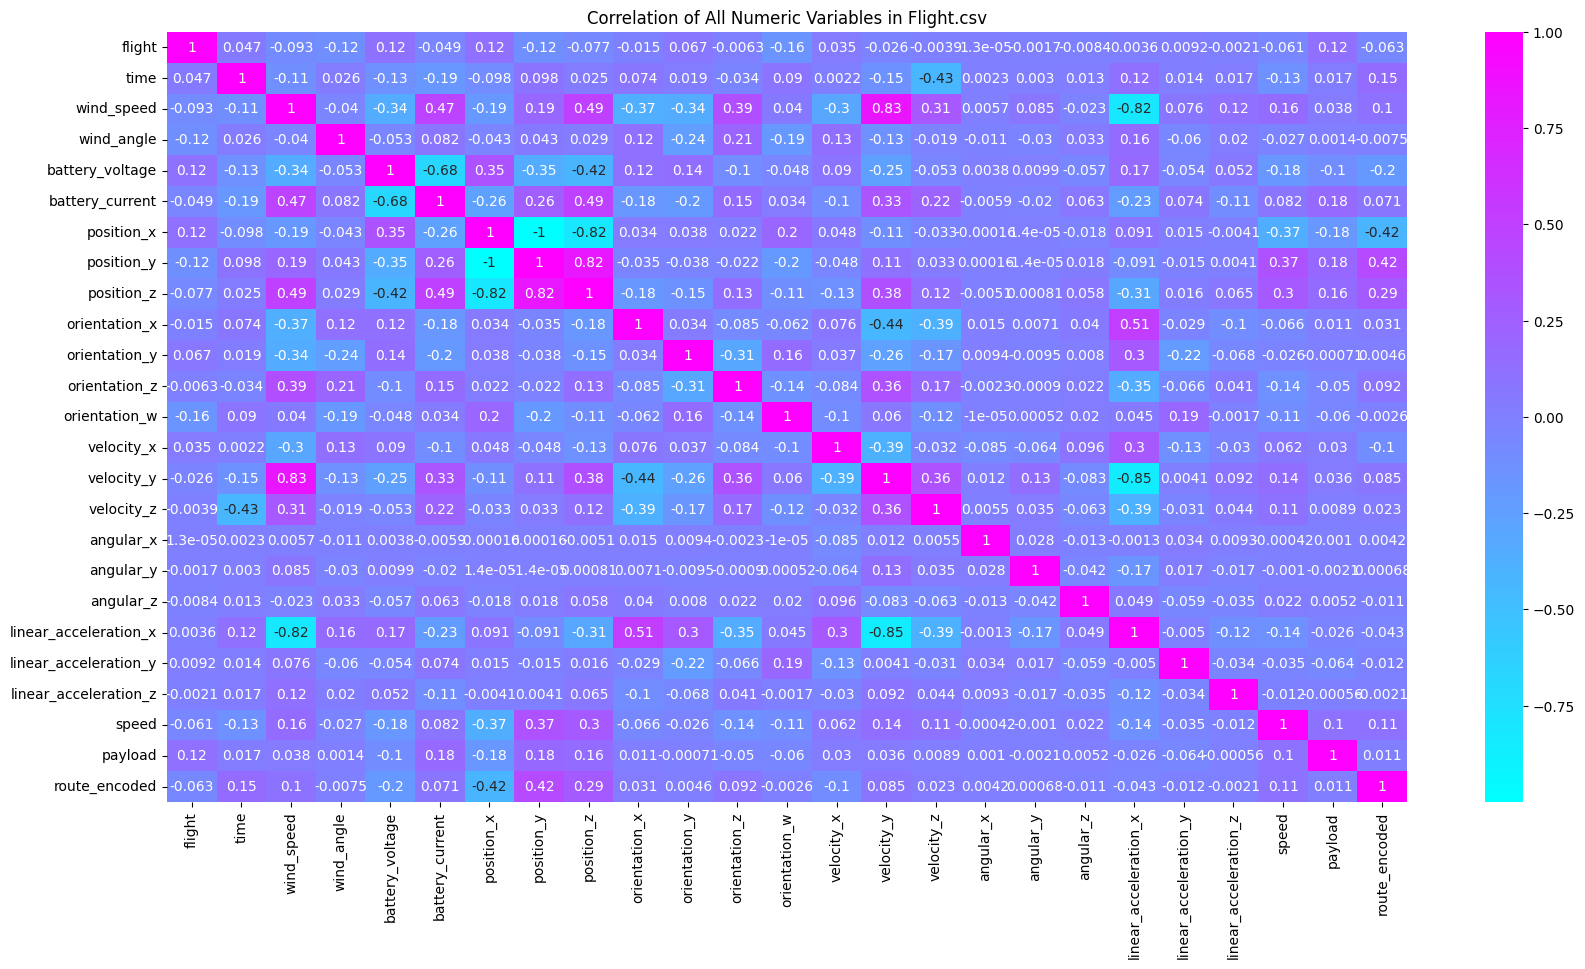

In [22]:
# Correlation of all numeric columns
plt.figure(figsize=(20, 10)) # Width, height
plt.title('Correlation of All Numeric Variables in Flight.csv')
# Select only numeric columns
numeric_df = drone_df_edited.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='cool')
plt.show()

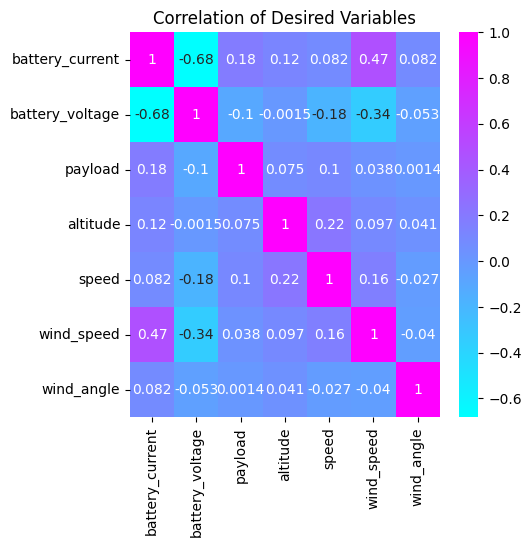

In [23]:
# Define desired columns
prediction1_columns = [
    'battery_current',
    'battery_voltage',
    'payload',
    'altitude',
    'speed',
    'wind_speed',
    'wind_angle'
]
# Correlation of desired columns
plt.figure(figsize=(5, 5)) # Width, height
plt.title('Correlation of Desired Variables')

# Calculate the correlation matrix
corr_matrix = drone_df_edited[prediction1_columns].corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='cool')
plt.show()

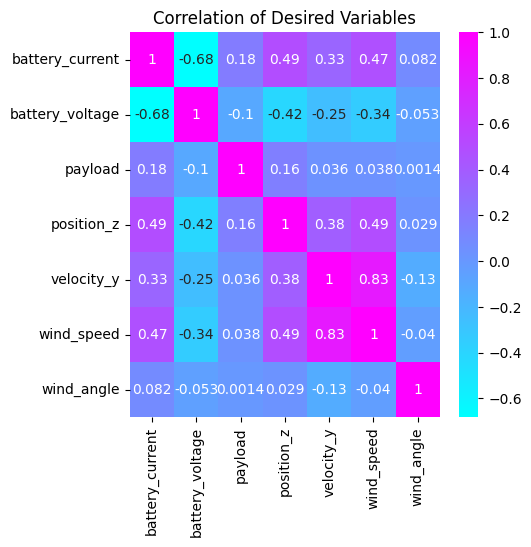

In [37]:
# Define desired columns
prediction2_columns = [
    'battery_current',
    'battery_voltage',
    'payload',
    'position_z',
    'velocity_y',
    'wind_speed',
    'wind_angle'
]
# Correlation of desired columns
plt.figure(figsize=(5, 5)) # Width, height
plt.title('Correlation of Desired Variables')

# Calculate the correlation matrix
corr_matrix = drone_df_edited[prediction2_columns].corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='cool')
plt.show()

In [25]:
drone_df_edited['date'].nunique()

18

In [26]:
drone_df_edited['datetime'].nunique()

38576

In [27]:
len(drone_df_edited)

255711

In [28]:
drone_df_edited['datetime'].head()

0   2019-04-07 10:13:00
1   2019-04-07 10:13:00
2   2019-04-07 10:13:00
3   2019-04-07 10:13:00
4   2019-04-07 10:13:01
Name: datetime, dtype: datetime64[ns]

In [29]:
drone_df_edited['time_day'].head()

0    10:13:00
1    10:13:00
2    10:13:00
3    10:13:00
4    10:13:01
Name: time_day, dtype: object

In [30]:
drone_df_edited['time_day'].nunique()

26704

In [31]:
drone_df_edited['date'].unique()

array([datetime.date(2019, 4, 7), datetime.date(2019, 5, 6),
       datetime.date(2019, 6, 5), datetime.date(2019, 6, 11),
       datetime.date(2019, 6, 19), datetime.date(2019, 6, 24),
       datetime.date(2019, 6, 25), datetime.date(2019, 6, 29),
       datetime.date(2019, 7, 1), datetime.date(2019, 7, 3),
       datetime.date(2019, 7, 9), datetime.date(2019, 7, 10),
       datetime.date(2019, 7, 15), datetime.date(2019, 7, 18),
       datetime.date(2019, 7, 24), datetime.date(2019, 8, 5),
       datetime.date(2019, 9, 19), datetime.date(2019, 10, 24)],
      dtype=object)

# Initial line plot for all data

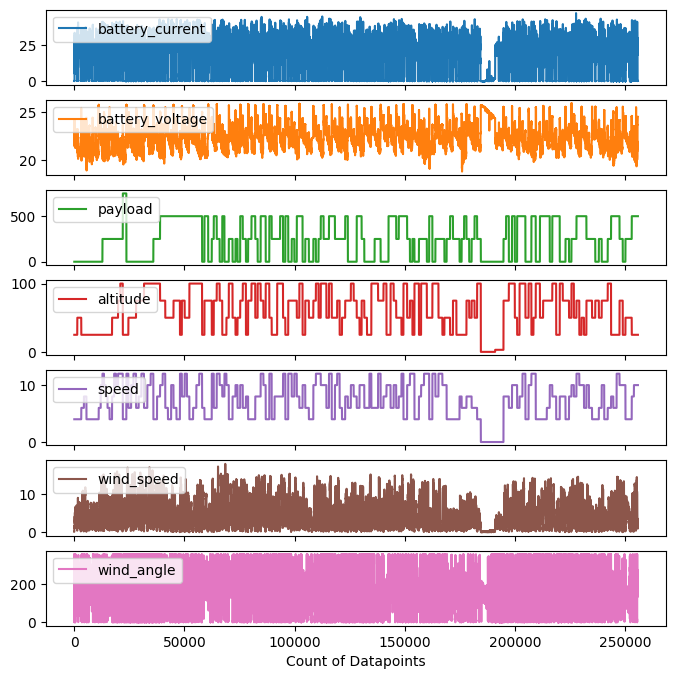

In [32]:
# Initial line plot of desired columns
ax = drone_df_edited.plot(y=prediction1_columns, subplots = True, figsize = (8,8))

# Align legend to upper left
for a in ax.flatten():
    a.legend(loc='upper left')
    a.set_xlabel("Count of Datapoints")

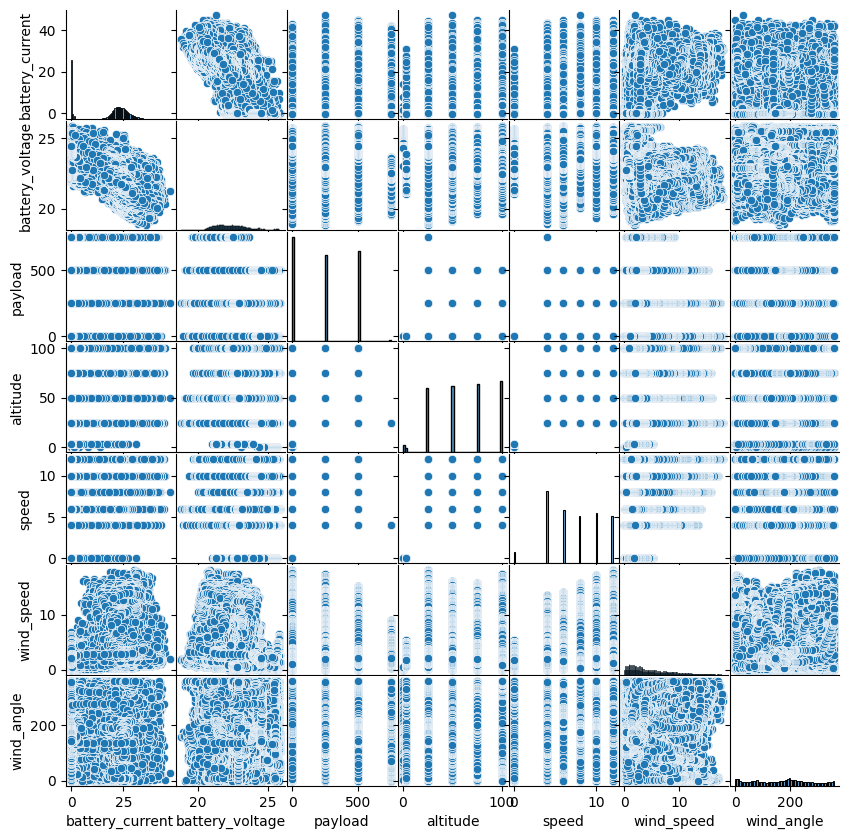

In [33]:
# Pairplot of desired columns
sns.pairplot(drone_df_edited[prediction1_columns], height=8) # Data and individual plot height
plt.gcf().set_size_inches(8, 8)  # Overall figure size
plt.show()

In [34]:
# Calculate daily averages
drone_df_edited[[
    'Battery_current_daily_avg',
    'Battery_voltage_daily_avg',
    'Payload_daily_avg',
    'Altitude_daily_avg',
    'Speed_daily_avg',
    'Wind_speed_daily_avg',
    'Wind_angle_daily_avg'
]] = drone_df_edited.groupby(pd.Grouper(key="datetime", freq="1D"))[prediction1_columns].transform('mean')

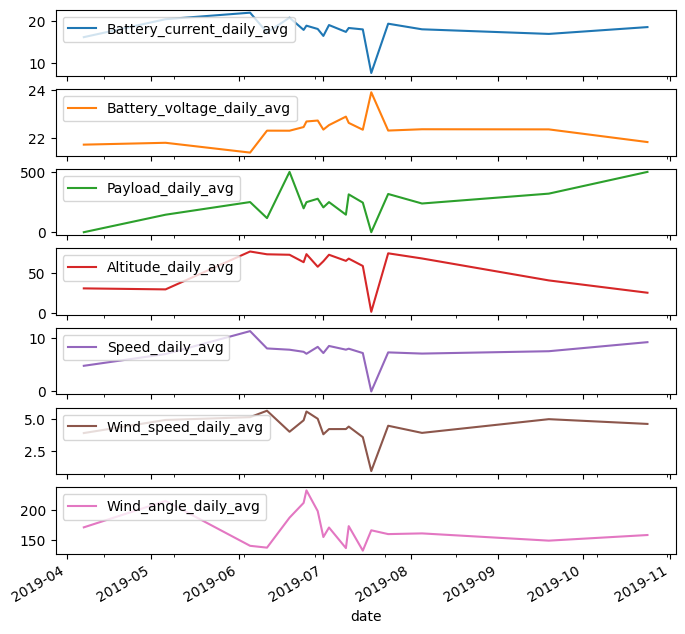

In [35]:
# Sort dataframe by date
drone_df_edited = drone_df_edited.sort_values('date')
# Convert to datetime to enable drop by time period (assisted by Chatgpt)
drone_df_edited['date'] = pd.to_datetime(drone_df_edited['date'])
# Keep 1st row of each date in new dataframe based 1 day period (assisted by Chatgpt)
df_unique_daily = drone_df_edited.loc[drone_df_edited['date'].dt.to_period('D').drop_duplicates().index]

# Build daily avg line plot
ax = df_unique_daily.plot(
    x='date',
    y=[
    'Battery_current_daily_avg',
    'Battery_voltage_daily_avg',
    'Payload_daily_avg',
    'Altitude_daily_avg',
    'Speed_daily_avg',
    'Wind_speed_daily_avg',
    'Wind_angle_daily_avg'
    ],
    subplots=True, figsize = (8,8)
)

# Align legend to upper left
for a in ax.flatten():
    a.legend(loc='upper left')

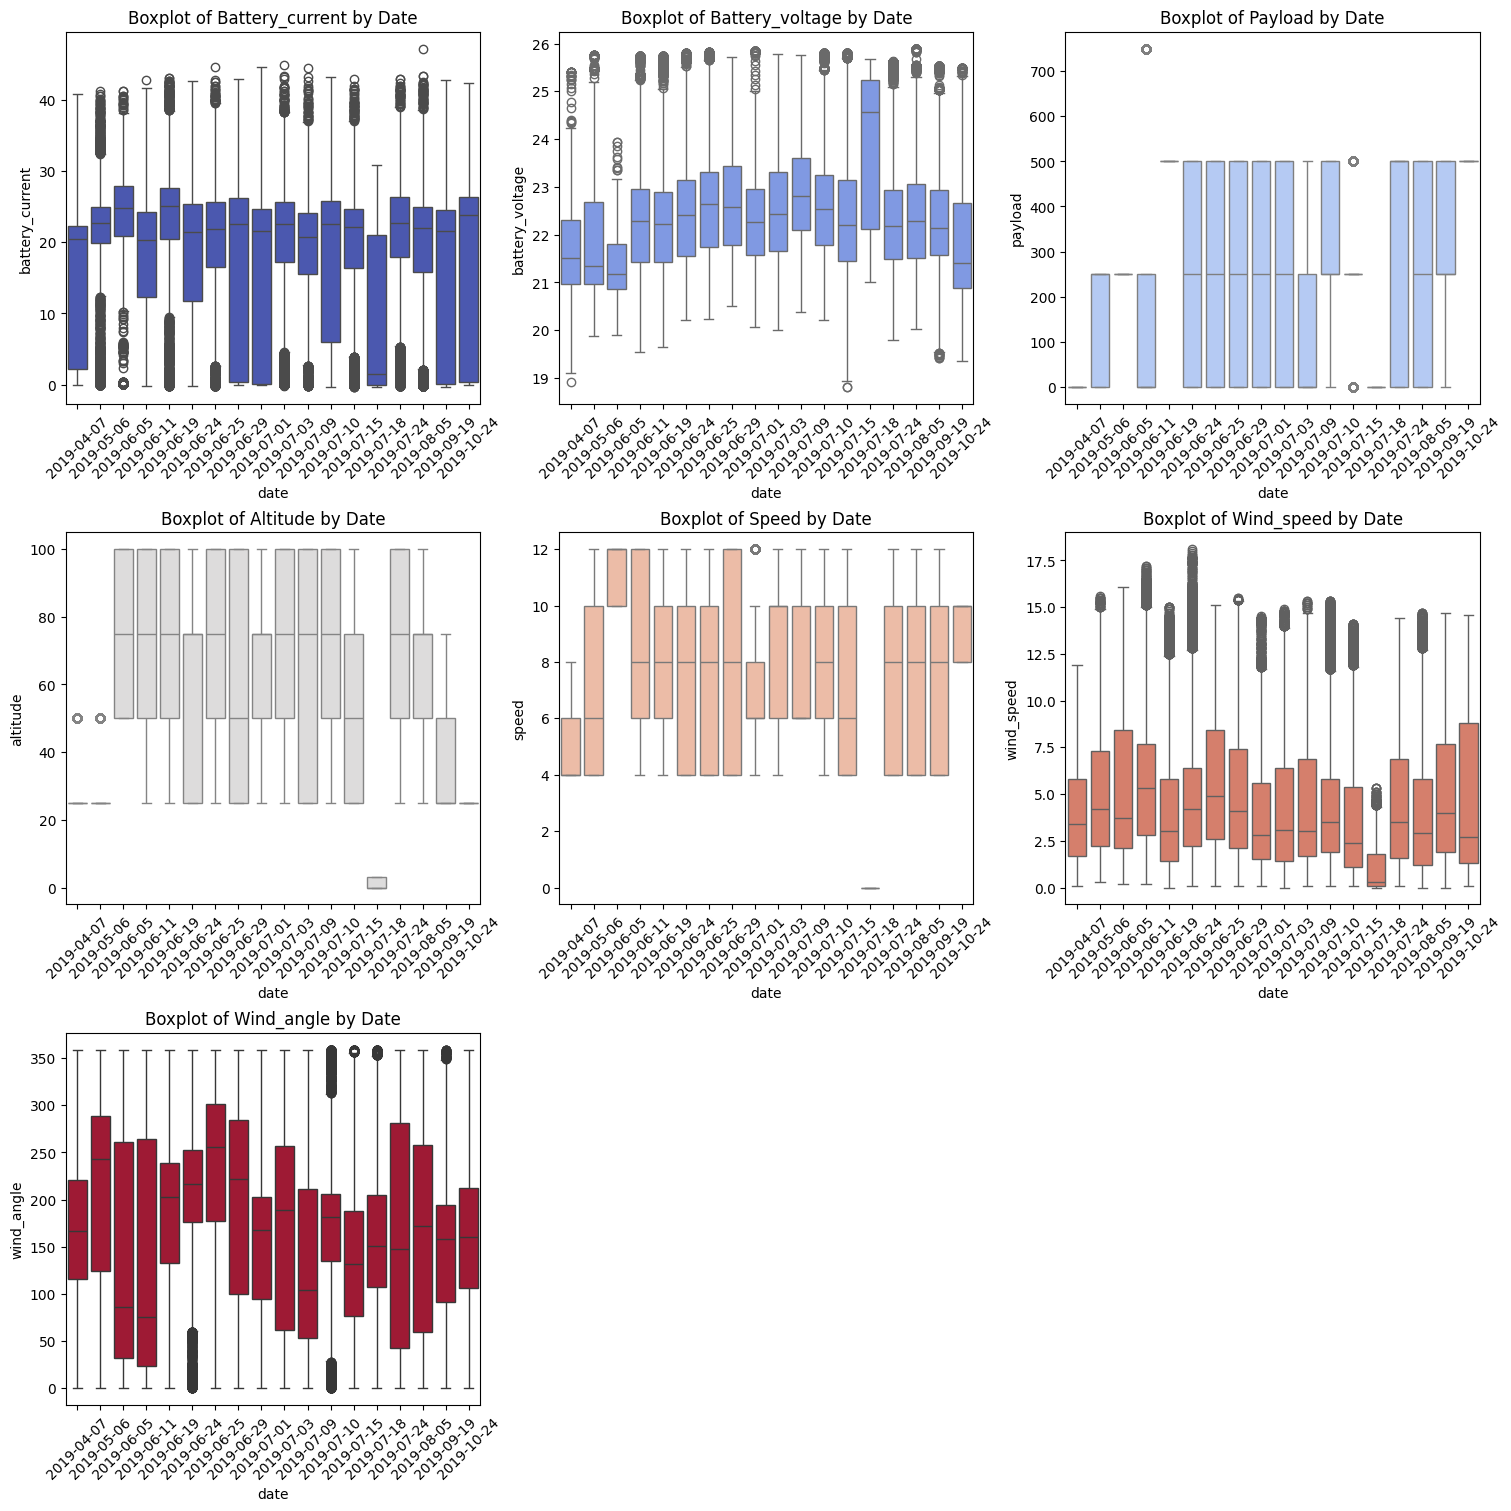

In [36]:
# Generate colors from a matplotlib palette (refined with ChatGPT for space saving)
num_colors = len(prediction1_columns)
colors = cm.coolwarm(np.linspace(0, 1, num_colors))  # Create colors for each subplot

# Define subplot column/rows
num_cols = 3
num_rows = (len(prediction1_columns) + num_cols - 1) // num_cols  # Calculate rows to fit all subplots

# Create the figure and axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), constrained_layout=True)

# Make grid of subplots to iterate
axes = axes.flatten()

# Boxplots with unique color for each subplot
for i, col in enumerate(prediction1_columns):
    sns.boxplot(
        x=drone_df_edited['date'],
        y=drone_df_edited[col],
        color=colors[i],
        ax=axes[i]
    )
    axes[i].set_title(f'Boxplot of {col.capitalize()} by Date')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Hide unused subplots
for j in range(len(prediction1_columns), len(axes)):
    fig.delaxes(axes[j])

plt.show()